# Reuters Assingment
## Adapted from Deep Learning with Python by Francois Chollet
#### Using the IMDB jupyter notebook as an example follow the prompts below to build a neural network to classify Reuters news wires into 46 different categories.

In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import backend
from tensorflow.keras.datasets import reuters
import numpy as np
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

TensorFlow 2.x selected.
2113536/2110848 [==============================] - 0s 0us/step


In [0]:
import operator
# Print the word index
wi = reuters.get_word_index()
print(sorted(wi.items(), key=operator.itemgetter(1)))

557056/550378 [==============================] - 0s 0us/step
[('the', 1), ('of', 2), ('to', 3), ('in', 4), ('said', 5), ('and', 6), ('a', 7), ('mln', 8), ('3', 9), ('for', 10), ('vs', 11), ('dlrs', 12), ('it', 13), ('reuter', 14), ('000', 15), ('1', 16), ('pct', 17), ('on', 18), ('from', 19), ('is', 20), ('that', 21), ('its', 22), ('cts', 23), ('by', 24), ('at', 25), ('year', 26), ('be', 27), ('with', 28), ('2', 29), ('will', 30), ('was', 31), ('billion', 32), ('he', 33), ('u', 34), ('s', 35), ('net', 36), ('has', 37), ('would', 38), ('an', 39), ('as', 40), ('5', 41), ('not', 42), ('loss', 43), ('4', 44), ('1986', 45), ('company', 46), ('which', 47), ('but', 48), ('this', 49), ('shr', 50), ('last', 51), ('are', 52), ('lt', 53), ('have', 54), ('or', 55), ('6', 56), ('bank', 57), ('7', 58), ('were', 59), ('8', 60), ('had', 61), ('oil', 62), ('trade', 63), ('share', 64), ('one', 65), ('about', 66), ('0', 67), ('inc', 68), ('9', 69), ('new', 70), ('profit', 71), ('also', 72), ('market', 73

In [0]:
# Here is the same function we created for vectorizing the IMDB data.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [0]:
# Vectorize the train_data and test_data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
# Print the unique train labels (there should be 46)
# Print the shape of x_train
print(len(np.unique(train_labels)))
print(x_train.shape)

46
(8982, 10000)


In [0]:
# Keras has a built in function for catergoial encoding which we saw in the MNIST workbook
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
# Convert the labels to cateforical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [0]:
# Import models and layers from Keras
from tensorflow.keras import models
from tensorflow.keras import layers

In [0]:
# Build a sequential model network with 1 hidden layer. The input and hidden layer must have more hidden units than the number of classification categories.
# Things to think about, input and hidden layer activation, output activation for a multiclass problem, input shape, output units
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_dim = 10000))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [0]:
# Compile the model. Think about what optimizer, loss function, and metrics will you use.
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [0]:
x_train.shape[1]

10000

In [0]:
# Train your model on the training data for 20 epochs and 500 batch size and a validation split = 20%.
history = model.fit(x_train,
                   y_train,
                   epochs = 20,
                   batch_size=500,
                   validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 1s 194us/sample - loss: 3.3190 - accuracy: 0.4333 - val_loss: 2.5832 - val_accuracy: 0.5409
Epoch 2/20
7185/7185 [==============================] - 1s 131us/sample - loss: 2.0737 - accuracy: 0.6035 - val_loss: 1.7137 - val_accuracy: 0.6550
Epoch 3/20
7185/7185 [==============================] - 1s 132us/sample - loss: 1.4144 - accuracy: 0.6971 - val_loss: 1.3547 - val_accuracy: 0.7140
Epoch 4/20
7185/7185 [==============================] - 1s 128us/sample - loss: 1.0761 - accuracy: 0.7722 - val_loss: 1.1919 - val_accuracy: 0.7368
Epoch 5/20
7185/7185 [==============================] - 1s 131us/sample - loss: 0.8604 - accuracy: 0.8153 - val_loss: 1.0911 - val_accuracy: 0.7546
Epoch 6/20
7185/7185 [==============================] - 1s 130us/sample - loss: 0.6902 - accuracy: 0.8555 - val_loss: 1.0241 - val_accuracy: 0.7713
Epoch 7/20
7185/7185 [==============================] - 1s 130us

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Use this bit of code to view the History output.
hist = pd.DataFrame(history.history)
print(hist.tail())

       loss  accuracy  val_loss  val_accuracy
0  2.113071  0.586169  1.346971      0.701891
1  0.916513  0.802920  1.069773      0.763070
2  0.510017  0.890882  0.986664      0.794216
3  0.298258  0.936657  0.976228      0.799778


In [0]:
# Let's plot the loss and accuracy vs epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

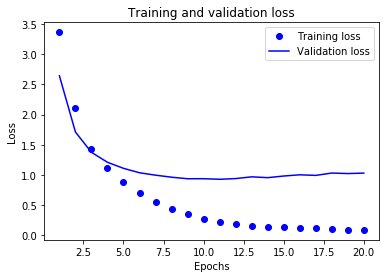

In [0]:
# Use the IMDB example to plot the validataion and training loss vs epocs
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

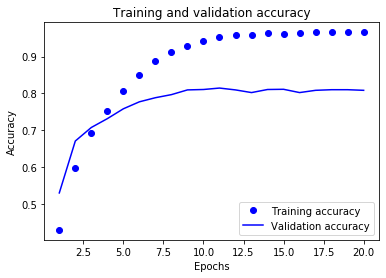

In [0]:
# Use the IMDB example to plot the validataion and training accuracy vs epocs
plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
# Evaluate the model on the test data and print the results
results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

2246/2246 [==============================] - 0s 126us/sample - loss: 1.0847 - accuracy: 0.7903
['loss', 'accuracy']
[1.0847431908520013, 0.7902939]


In [0]:
# Clear your session using this command: backend.clear_session() 
# Build a new model and try to get the test accuracy above 80%
# Things to try: more hidden layers and hiddent units, activation types, epochs, batch size, and validation_split.
# Try as many models as you like.  Be sure to clear the session each time.  backend.clear_session() 
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train,
                   y_train,
                   epochs = 4,
                   batch_size=250,
                   validation_split = 0.1)

results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

Train on 8083 samples, validate on 899 samples
Epoch 1/4
8083/8083 [==============================] - 3s 343us/sample - loss: 2.1131 - accuracy: 0.5862 - val_loss: 1.3470 - val_accuracy: 0.7019
Epoch 2/4
8083/8083 [==============================] - 2s 303us/sample - loss: 0.9165 - accuracy: 0.8029 - val_loss: 1.0698 - val_accuracy: 0.7631
Epoch 3/4
8083/8083 [==============================] - 2s 303us/sample - loss: 0.5100 - accuracy: 0.8909 - val_loss: 0.9867 - val_accuracy: 0.7942
Epoch 4/4
2246/2246 [==============================] - 0s 212us/sample - loss: 0.9182 - accuracy: 0.7921
['loss', 'accuracy']
[0.9181946368484972, 0.7920748]
